<a href="https://colab.research.google.com/github/Johno4308/KAGGLE-LESSONS/blob/main/PANDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creating, Reading and Writing

You can't work with data if you can't read it. Get started here.

## Introduction

In this micro-course, you'll learn all about pandas, the most popular Python library for data analysis.

Along the way, you'll complete several hands-on exercises with real-world data. We recommend that you work on the exercises while reading the corresponding tutorials.

To start the first exercise, please click here.

In this tutorial, you will learn how to create your own data, along with how to work with data that already exists.

Getting started
To use pandas, you'll typically start with the following line of code.





In [46]:
import pandas as pd

## Creating data
There are two core objects in pandas: the DataFrame and the Series.

## DataFrame
A DataFrame is a table. It contains an array of individual entries, each of which has a certain value. Each entry corresponds to a row (or record) and a column.

For example, consider the following simple DataFrame:

In [47]:
pd.DataFrame({'Yes': [50, 21, 23], 'No': [131, 2, 90], 'Maybe': [55, 60, 70]})

,Yes,No,Maybe
0,50,131,55
1,21,2,60
2,23,90,70


In this example, the "0, No" entry has the value of 131. The "0, Yes" entry has a value of 50, and so on.

DataFrame entries are not limited to integers. For instance, here's a DataFrame whose values are strings:

In [48]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']})

,Bob,Sue
0,I liked it.,Pretty good.
1,It was awful.,Bland.


We are using the pd.DataFrame() constructor to generate these DataFrame objects. The syntax for declaring a new one is a dictionary whose keys are the column names (Bob and Sue in this example), and whose values are a list of entries. This is the standard way of constructing a new DataFrame, and the one you are most likely to encounter.

The dictionary-list constructor assigns values to the column labels, but just uses an ascending count from 0 (0, 1, 2, 3, ...) for the row labels. Sometimes this is OK, but oftentimes we will want to assign these labels ourselves.

The list of row labels used in a DataFrame is known as an Index. We can assign values to it by using an index parameter in our constructor:

In [49]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'],
              'Sue': ['Pretty good.', 'Bland.']},
             index=['Product A', 'Product B'])

,Bob,Sue
Product A,I liked it.,Pretty good.
Product B,It was awful.,Bland.


## Series

A Series, by contrast, is a sequence of data values. If a DataFrame is a table, a Series is a list. And in fact you can create one with nothing more than a list:

In [50]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

A Series is, in essence, a single column of a DataFrame. So you can assign row labels to the Series the same way as before, using an index parameter. However, a Series does not have a column name, it only has one overall name:

In [51]:
pd.Series([30, 35, 40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')

2015 Sales    30
2016 Sales    35
2017 Sales    40
Name: Product A, dtype: int64

The Series and the DataFrame are intimately related. It's helpful to think of a DataFrame as actually being just a bunch of Series "glued together". We'll see more of this in the next section of this tutorial.

## Reading data files
Being able to create a DataFrame or Series by hand is handy. But, most of the time, we won't actually be creating our own data by hand. Instead, we'll be working with data that already exists.

Data can be stored in any of a number of different forms and formats. By far the most basic of these is the humble CSV file. When you open a CSV file you get something that looks like this:

```
Product A,Product B,Product C,
30,21,9,
35,34,1,
41,11,11

```
So a CSV file is a table of values separated by commas. Hence the name: "Comma-Separated Values", or CSV.

Let's now set aside our toy datasets and see what a real dataset looks like when we read it into a DataFrame. We'll use the pd.read_csv() function to read the data into a DataFrame. This goes thusly:


In [52]:
wine_reviews = pd.read_csv("winemag-data-130k-v2.csv")

We can use the shape attribute to check how large the resulting DataFrame is:

In [53]:
wine_reviews.shape

(129971, 14)

In [54]:
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


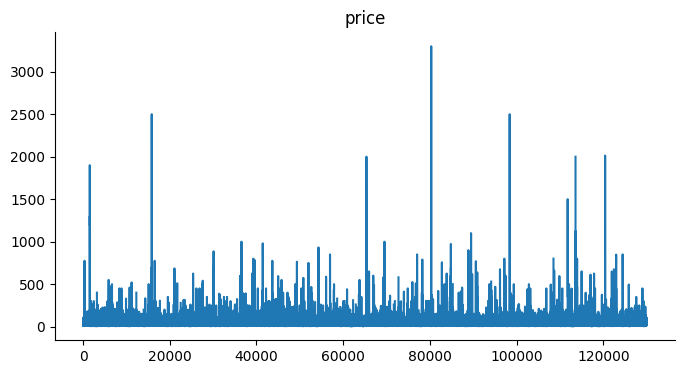

In [55]:
# @title price

from matplotlib import pyplot as plt
wine_reviews['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

The pd.read_csv() function is well-endowed, with over 30 optional parameters you can specify. For example, you can see in this dataset that the CSV file has a built-in index, which pandas did not pick up on automatically. To make pandas use that column for the index (instead of creating a new one from scratch), we can specify an index_col.

In [56]:
reviews = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Indexing, Selecting & Assigning

Pro data scientists do this dozens of times a day. You can, too!

### Introduction

Selecting specific values of a pandas DataFrame or Series to work on is an implicit step in almost any data operation you'll run, so one of the first things you need to learn in working with data in Python is how to go about selecting the data points relevant to you quickly and effectively.

### Native accessors

Native Python objects provide good ways of indexing data. Pandas carries all of these over, which helps make it easy to start with.

Consider this DataFrame:

In [57]:
pd.set_option('display.max_rows', 5)
reviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In Python, we can access the property of an object by accessing it as an attribute. A book object, for example, might have a title property, which we can access by calling book.title. Columns in a pandas DataFrame work in much the same way.

Hence to access the country property of reviews we can use:

In [58]:
reviews.country

0            Italy
1         Portugal
            ...   
129969      France
129970      France
Name: country, Length: 129971, dtype: object

If we have a Python dictionary, we can access its values using the indexing ([]) operator. We can do the same with columns in a DataFrame:

In [59]:
reviews['country']

0            Italy
1         Portugal
            ...   
129969      France
129970      France
Name: country, Length: 129971, dtype: object

These are the two ways of selecting a specific Series out of a DataFrame. Neither of them is more or less syntactically valid than the other, but the indexing operator [] does have the advantage that it can handle column names with reserved characters in them (e.g. if we had a country providence column, reviews.country providence wouldn't work).

Doesn't a pandas Series look kind of like a fancy dictionary? It pretty much is, so it's no surprise that, to drill down to a single specific value, we need only use the indexing operator [] once more:

In [60]:
reviews['country'][10000]

'France'

## Indexing in pandas

The indexing operator and attribute selection are nice because they work just like they do in the rest of the Python ecosystem. As a novice, this makes them easy to pick up and use. However, pandas has its own accessor operators, loc and iloc. For more advanced operations, these are the ones you're supposed to be using.

Index-based selection
Pandas indexing works in one of two paradigms. The first is index-based selection: selecting data based on its numerical position in the data. iloc follows this paradigm.

To select the first row of data in a DataFrame, we may use the following:

In [61]:
reviews.iloc[0]

country                                                    Italy
description    Aromas include tropical fruit, broom, brimston...
                                     ...                        
variety                                              White Blend
winery                                                   Nicosia
Name: 0, Length: 13, dtype: object

Both loc and iloc are row-first, column-second. This is the opposite of what we do in native Python, which is column-first, row-second.

This means that it's marginally easier to retrieve rows, and marginally harder to get retrieve columns. To get a column with iloc, we can do the following:

In [62]:
reviews.iloc[:, 0]

0            Italy
1         Portugal
            ...   
129969      France
129970      France
Name: country, Length: 129971, dtype: object

On its own, the : operator, which also comes from native Python, means "everything". When combined with other selectors, however, it can be used to indicate a range of values. For example, to select the country column from just the first, second, and third row, we would do:

In [63]:
reviews.iloc[:3, 0]

0       Italy
1    Portugal
2          US
Name: country, dtype: object

Or, to select just the second and third entries, we would do:

In [64]:
reviews.iloc[1:3, 0]

1    Portugal
2          US
Name: country, dtype: object

It's also possible to pass a list:

In [65]:
reviews.iloc[[0, 1, 2], 0]

0       Italy
1    Portugal
2          US
Name: country, dtype: object

Finally, it's worth knowing that negative numbers can be used in selection. This will start counting forwards from the end of the values. So for example here are the last five elements of the dataset.

In [66]:
reviews.iloc[-5:]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


### Label-based selection

The second paradigm for attribute selection is the one followed by the loc operator: label-based selection. In this paradigm, it's the data index value, not its position, which matters.

For example, to get the first entry in reviews, we would now do the following:

In [67]:
reviews.loc[0, 'country']

'Italy'

iloc is conceptually simpler than loc because it ignores the dataset's indices. When we use iloc we treat the dataset like a big matrix (a list of lists), one that we have to index into by position. loc, by contrast, uses the information in the indices to do its work. Since your dataset usually has meaningful indices, it's usually easier to do things using loc instead. For example, here's one operation that's much easier using loc:

In [68]:
reviews.loc[:, ['taster_name', 'taster_twitter_handle', 'points']]

,taster_name,taster_twitter_handle,points
0,Kerin O’Keefe,@kerinokeefe,87
1,Roger Voss,@vossroger,87
...,...,...,...
129969,Roger Voss,@vossroger,90
129970,Roger Voss,@vossroger,90


Choosing between loc and iloc
When choosing or transitioning between loc and iloc, there is one "gotcha" worth keeping in mind, which is that the two methods use slightly different indexing schemes.

iloc uses the Python stdlib indexing scheme, where the first element of the range is included and the last one excluded. So 0:10 will select entries 0,...,9. loc, meanwhile, indexes inclusively. So 0:10 will select entries 0,...,10.

Why the change? Remember that loc can index any stdlib type: strings, for example. If we have a DataFrame with index values Apples, ..., Potatoes, ..., and we want to select "all the alphabetical fruit choices between Apples and Potatoes", then it's a lot more convenient to index df.loc['Apples':'Potatoes'] than it is to index something like df.loc['Apples', 'Potatoet'] (t coming after s in the alphabet).

This is particularly confusing when the DataFrame index is a simple numerical list, e.g. 0,...,1000. In this case df.iloc[0:1000] will return 1000 entries, while df.loc[0:1000] return 1001 of them! To get 1000 elements using loc, you will need to go one lower and ask for df.loc[0:999].

Otherwise, the semantics of using loc are the same as those for iloc.

Manipulating the index
Label-based selection derives its power from the labels in the index. Critically, the index we use is not immutable. We can manipulate the index in any way we see fit.

The set_index() method can be used to do the job. Here is what happens when we set_index to the title field:

In [69]:
reviews.set_index("title")

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,variety,winery
title,,,,,,,,,,,,
Nicosia 2013 Vulkà Bianco (Etna),Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,White Blend,Nicosia
Quinta dos Avidagos 2011 Avidagos Red (Douro),Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...
Domaine Marcel Deiss 2012 Pinot Gris (Alsace),France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Pinot Gris,Domaine Marcel Deiss
Domaine Schoffit 2012 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace),France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Gewürztraminer,Domaine Schoffit


This is useful if you can come up with an index for the dataset which is better than the current one.

### Conditional selection

So far we've been indexing various strides of data, using structural properties of the DataFrame itself. To do interesting things with the data, however, we often need to ask questions based on conditions.

For example, suppose that we're interested specifically in better-than-average wines produced in Italy.

We can start by checking if each wine is Italian or not:

In [70]:
reviews.country == "Italy"

0          True
1         False
          ...  
129969    False
129970    False
Name: country, Length: 129971, dtype: bool

This operation produced a Series of True/False booleans based on the country of each record. This result can then be used inside of loc to select the relevant data:

In [71]:
reviews.loc[reviews.country == 'Italy']

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129961,Italy,"Intense aromas of wild cherry, baking spice, t...",NaN,90,30.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,COS 2013 Frappato (Sicilia),Frappato,COS
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano


This DataFrame has ~20,000 rows. The original had ~130,000. That means that around 15% of wines originate from Italy.

We also wanted to know which ones are better than average. Wines are reviewed on a 80-to-100 point scale, so this could mean wines that accrued at least 90 points.

We can use the ampersand (&) to bring the two questions together:

In [72]:
reviews.loc[(reviews.country == 'Italy') & (reviews.points >= 90)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
120,Italy,"Slightly backward, particularly given the vint...",Bricco Rocche Prapó,92,70.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2003 Bricco Rocche Prapó (Barolo),Nebbiolo,Ceretto
130,Italy,"At the first it was quite muted and subdued, b...",Bricco Rocche Brunate,91,70.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2003 Bricco Rocche Brunate (Barolo),Nebbiolo,Ceretto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129961,Italy,"Intense aromas of wild cherry, baking spice, t...",NaN,90,30.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,COS 2013 Frappato (Sicilia),Frappato,COS
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano


Suppose we'll buy any wine that's made in Italy or which is rated above average. For this we use a pipe (|):

In [73]:
reviews.loc[(reviews.country == 'France') | (reviews.price >= 200)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


Pandas comes with a few built-in conditional selectors, two of which we will highlight here.

The first is isin. isin is lets you select data whose value "is in" a list of values. For example, here's how we can use it to select wines only from Italy or France:

In [74]:
reviews.loc[reviews.country.isin(['Italy', 'France'])]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


The second is isnull (and its companion notnull). These methods let you highlight values which are (or are not) empty (NaN). For example, to filter out wines lacking a price tag in the dataset, here's what we would do:

In [75]:
reviews.loc[reviews.price.notnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


## Assigning data

Going the other way, assigning data to a DataFrame is easy. You can assign either a constant value:

In [76]:
reviews['critic'] = 'everyone'
reviews['critic']

0         everyone
1         everyone
            ...   
129969    everyone
129970    everyone
Name: critic, Length: 129971, dtype: object

Or with an iterable of values:

In [77]:
reviews['index_backwards'] = range(len(reviews), 0, -1)
reviews['index_backwards']

0         129971
1         129970
           ...  
129969         2
129970         1
Name: index_backwards, Length: 129971, dtype: int64

### Renaming and Combining

Data comes in from many sources. Help it all make sense together

### Introduction¶

Oftentimes data will come to us with column names, index names, or other naming conventions that we are not satisfied with. In that case, you'll learn how to use pandas functions to change the names of the offending entries to something better.

You'll also explore how to combine data from multiple DataFrames and/or Series.

#### Renaming
The first function we'll introduce here is rename(), which lets you change index names and/or column names. For example, to change the points column in our dataset to score, we would do:

In [78]:
import pandas as pd
pd.set_option('display.max_rows', 5)
reviews = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)


reviews.rename(columns={'points': 'score'})

,country,description,designation,score,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


rename() lets you rename index or column values by specifying a index or column keyword parameter, respectively. It supports a variety of input formats, but usually a Python dictionary is the most convenient. Here is an example using it to rename some elements of the index.

In [79]:
reviews.rename(index={0: 'firstEntry', 1: 'secondEntry'})

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
firstEntry,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
secondEntry,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


You'll probably rename columns very often, but rename index values very rarely. For that, set_index() is usually more convenient.

Both the row index and the column index can have their own name attribute. The complimentary rename_axis() method may be used to change these names. For example:

In [80]:
reviews.rename_axis("wines", axis='rows').rename_axis("fields", axis='columns')

fields,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
wines,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


## Combining
When performing operations on a dataset, we will sometimes need to combine different DataFrames and/or Series in non-trivial ways. Pandas has three core methods for doing this. In order of increasing complexity, these are concat(), join(), and merge(). Most of what merge() can do can also be done more simply with join(), so we will omit it and focus on the first two functions here.

The simplest combining method is concat(). Given a list of elements, this function will smush those elements together along an axis.

This is useful when we have data in different DataFrame or Series objects but having the same fields (columns). One example: the YouTube Videos dataset, which splits the data up based on country of origin (e.g. Canada and the UK, in this example). If we want to study multiple countries simultaneously, we can use concat() to smush them together:

In [81]:
canadian_youtube = pd.read_csv('CAvideos.csv')
british_youtube = pd.read_csv('GBvideos.csv')

pd.concat([canadian_youtube, british_youtube])

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38914,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...
38915,4YFo4bdMO8Q,18.14.06,KYLE - Ikuyo feat. 2 Chainz & Sophia Black [A...,SuperDuperKyle,10,2018-05-11T04:06:35.000Z,"Kyle|""SuperDuperKyle""|""Ikuyo""|""2 Chainz""|""Soph...",607552,18271,274,1423,https://i.ytimg.com/vi/4YFo4bdMO8Q/default.jpg,False,False,False,Debut album 'Light of Mine' out now: http://ky...


The middlemost combiner in terms of complexity is join(). join() lets you combine different DataFrame objects which have an index in common. For example, to pull down videos that happened to be trending on the same day in both Canada and the UK, we could do the following:

In [82]:
left = canadian_youtube.set_index(['title', 'trending_date'])
right = british_youtube.set_index(['title', 'trending_date'])

left.join(right, lsuffix='_CAN', rsuffix='_UK')

,,video_id_CAN,channel_title_CAN,category_id_CAN,publish_time_CAN,tags_CAN,views_CAN,likes_CAN,dislikes_CAN,comment_count_CAN,thumbnail_link_CAN,...,tags_UK,views_UK,likes_UK,dislikes_UK,comment_count_UK,thumbnail_link_UK,comments_disabled_UK,ratings_disabled_UK,video_error_or_removed_UK,description_UK
title,trending_date,,,,,,,,,,,,,,,,,,,,,
!! THIS VIDEO IS NOTHING BUT PAIN !! | Getting Over It - Part 7,18.04.01,PNn8sECd7io,Markiplier,20,2018-01-03T19:33:53.000Z,"getting over it|""markiplier""|""funny moments""|""...",835930,47058,1023,8250,https://i.ytimg.com/vi/PNn8sECd7io/default.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"#1 Fortnite World Rank - 2,323 Solo Wins!",18.09.03,DvPW66IFhMI,AlexRamiGaming,20,2018-03-09T07:15:52.000Z,"PS4 Battle Royale|""PS4 Pro Battle Royale""|""Bat...",212838,5199,542,11,https://i.ytimg.com/vi/DvPW66IFhMI/default.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
🚨 BREAKING NEWS 🔴 Raja Live all Slot Channels Welcome 🎰,18.07.05,Wt9Gkpmbt44,TheBigJackpot,24,2018-05-07T06:58:59.000Z,"Slot Machine|""win""|""Gambling""|""Big Win""|""raja""...",28973,2167,175,10,https://i.ytimg.com/vi/Wt9Gkpmbt44/default.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
🚨Active Shooter at YouTube Headquarters - LIVE BREAKING NEWS COVERAGE,18.04.04,Az72jrKbANA,Right Side Broadcasting Network,25,2018-04-03T23:12:37.000Z,"YouTube shooter|""YouTube active shooter""|""acti...",103513,1722,181,76,https://i.ytimg.com/vi/Az72jrKbANA/default.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The lsuffix and rsuffix parameters are necessary here because the data has the same column names in both British and Canadian datasets. If this wasn't true (because, say, we'd renamed them beforehand) we wouldn't need them.

## Summary Functions and Maps

Extract insights from your data.

## Introduction

In the last tutorial, we learned how to select relevant data out of a DataFrame or Series. Plucking the right data out of our data representation is critical to getting work done, as we demonstrated in the exercises.

However, the data does not always come out of memory in the format we want it in right out of the bat. Sometimes we have to do some more work ourselves to reformat it for the task at hand. This tutorial will cover different operations we can apply to our data to get the input "just right".

To start the exercise for this topic, please click here.

We'll use the Wine Magazine data for demonstration.

In [83]:
import pandas as pd
pd.set_option('display.max_rows', 5)
import numpy as np
reviews = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)

In [84]:
reviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


Summary functions
Pandas provides many simple "summary functions" (not an official name) which restructure the data in some useful way. For example, consider the describe() method:

In [85]:
reviews.points.describe()

count    129971.000000
mean         88.447138
             ...      
75%          91.000000
max         100.000000
Name: points, Length: 8, dtype: float64

In [86]:
reviews.country.describe()

count     129908
unique        43
top           US
freq       54504
Name: country, dtype: object

This method generates a high-level summary of the attributes of the given column. It is type-aware, meaning that its output changes based on the data type of the input. The output above only makes sense for numerical data; for string data here's what we get:

In [87]:
reviews.taster_name.describe()

count         103727
unique            19
top       Roger Voss
freq           25514
Name: taster_name, dtype: object

If you want to get some particular simple summary statistic about a column in a DataFrame or a Series, there is usually a helpful pandas function that makes it happen.

For example, to see the mean of the points allotted (e.g. how well an averagely rated wine does), we can use the mean() function:

In [88]:
reviews.points.mean()

88.44713820775404

To see a list of unique values we can use the unique() function:

In [89]:
reviews.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

To see a list of unique values and how often they occur in the dataset, we can use the value_counts() method:



In [90]:
reviews.taster_name.value_counts()

Roger Voss           25514
Michael Schachner    15134
                     ...  
Fiona Adams             27
Christina Pickard        6
Name: taster_name, Length: 19, dtype: int64

## Maps
A map is a term, borrowed from mathematics, for a function that takes one set of values and "maps" them to another set of values. In data science we often have a need for creating new representations from existing data, or for transforming data from the format it is in now to the format that we want it to be in later. Maps are what handle this work, making them extremely important for getting your work done!

There are two mapping methods that you will use often.

map() is the first, and slightly simpler one. For example, suppose that we wanted to remean the scores the wines received to 0. We can do this as follows:

In [91]:
review_points_mean = reviews.points.mean()
reviews.points.map(lambda p: p - review_points_mean)

0        -1.447138
1        -1.447138
            ...   
129969    1.552862
129970    1.552862
Name: points, Length: 129971, dtype: float64

The function you pass to map() should expect a single value from the Series (a point value, in the above example), and return a transformed version of that value. map() returns a new Series where all the values have been transformed by your function.

apply() is the equivalent method if we want to transform a whole DataFrame by calling a custom method on each row.

In [92]:
def remean_points(row):
    row.points = row.points - review_points_mean
    return row

reviews.apply(remean_points, axis='columns')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,-1.447138,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,-1.447138,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,1.552862,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,1.552862,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


If we had called reviews.apply() with axis='index', then instead of passing a function to transform each row, we would need to give a function to transform each column.

Note that map() and apply() return new, transformed Series and DataFrames, respectively. They don't modify the original data they're called on. If we look at the first row of reviews, we can see that it still has its original points value.

In [93]:
reviews.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


Pandas provides many common mapping operations as built-ins. For example, here's a faster way of remeaning our points column:

In [94]:
review_points_mean = reviews.points.mean()
reviews.points - review_points_mean

0        -1.447138
1        -1.447138
            ...   
129969    1.552862
129970    1.552862
Name: points, Length: 129971, dtype: float64

In this code we are performing an operation between a lot of values on the left-hand side (everything in the Series) and a single value on the right-hand side (the mean value). Pandas looks at this expression and figures out that we must mean to subtract that mean value from every value in the dataset.

Pandas will also understand what to do if we perform these operations between Series of equal length. For example, an easy way of combining country and region information in the dataset would be to do the following:

In [95]:
reviews.country + " - " + reviews.region_1

0            Italy - Etna
1                     NaN
               ...       
129969    France - Alsace
129970    France - Alsace
Length: 129971, dtype: object

These operators are faster than map() or apply() because they use speed ups built into pandas. All of the standard Python operators (>, <, ==, and so on) work in this manner.

However, they are not as flexible as map() or apply(), which can do more advanced things, like applying conditional logic, which cannot be done with addition and subtraction alone.

## Grouping and Sorting

Scale up your level of insight. The more complex the dataset, the more this matters

### Introduction¶
Maps allow us to transform data in a DataFrame or Series one value at a time for an entire column. However, often we want to group our data, and then do something specific to the group the data is in.

As you'll learn, we do this with the groupby() operation. We'll also cover some additional topics, such as more complex ways to index your DataFrames, along with how to sort your data.


### Groupwise analysis
One function we've been using heavily thus far is the value_counts() function. We can replicate what value_counts() does by doing the following:

In [96]:
import pandas as pd
reviews = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
pd.set_option("display.max_rows", 5)

reviews.groupby('points').points.count()

points
80     397
81     692
      ... 
99      33
100     19
Name: points, Length: 21, dtype: int64

groupby() created a group of reviews which allotted the same point values to the given wines. Then, for each of these groups, we grabbed the points() column and counted how many times it appeared. value_counts() is just a shortcut to this groupby() operation.

We can use any of the summary functions we've used before with this data. For example, to get the cheapest wine in each point value category, we can do the following:

In [97]:
reviews.groupby('points').price.min()

points
80      5.0
81      5.0
       ... 
99     44.0
100    80.0
Name: price, Length: 21, dtype: float64

You can think of each group we generate as being a slice of our DataFrame containing only data with values that match. This DataFrame is accessible to us directly using the apply() method, and we can then manipulate the data in any way we see fit. For example, here's one way of selecting the name of the first wine reviewed from each winery in the dataset:

In [98]:
reviews.groupby('winery').apply(lambda df: df.title.iloc[0])

winery
1+1=3                          1+1=3 NV Rosé Sparkling (Cava)
10 Knots                 10 Knots 2010 Viognier (Paso Robles)
                                  ...                        
àMaurice    àMaurice 2013 Fred Estate Syrah (Walla Walla V...
Štoka                         Štoka 2009 Izbrani Teran (Kras)
Length: 16757, dtype: object

For even more fine-grained control, you can also group by more than one column. For an example, here's how we would pick out the best wine by country and province:

In [99]:
reviews.groupby(['country', 'province']).apply(lambda df: df.loc[df.points.idxmax()])

country  \
country   province                      
Argentina Mendoza Province  Argentina   
          Other             Argentina   
...                               ...   
Uruguay   San Jose            Uruguay   
          Uruguay             Uruguay   

                                                                  description  \
country   province                                                              
Argentina Mendoza Province  If the color doesn't tell the full story, the ...   
          Other             Take note, this could be the best wine Colomé ...   
...                                                                       ...   
Uruguay   San Jose          Baked, sweet, heavy aromas turn earthy with ti...   
          Uruguay           Cherry and berry aromas are ripe, healthy and ...   

                                          designation  points  price  \
country   province                                                     
Argentina Mendoza Province           Nicasia Vineyard      97  120.0   
          Other                               Reserva      95   90.0   
...                                               ...     ...    ...   
Uruguay   San Jose           El Preciado Gran Reserva      87   50.0   
          Uruguay           Blend 002 Limited Edition      91   22.0   

                                    province region_1 region_2  \
country   province                                               
Argentina Mendoza Province  Mendoza Province  Mendoza      NaN   
          Other                        Other    Salta      NaN   
...                                      ...      ...      ...   
Uruguay   San Jose                  San Jose      NaN      NaN   
          Uruguay                    Uruguay      NaN      NaN   

                                  taster_name taster_twitter_handle  \
country   province                                                    
Argentina Mendoza Province  Michael Schachner           @wineschach   
          Other             Michael Schachner           @wineschach   
...                                       ...                   ...   
Uruguay   San Jose          Michael Schachner           @wineschach   
          Uruguay           Michael Schachner           @wineschach   

                                                                        title  \
country   province                                                              
Argentina Mendoza Province  Bodega Catena Zapata 2006 Nicasia Vineyard Mal...   
          Other                            Colomé 2010 Reserva Malbec (Salta)   
...                                                                       ...   
Uruguay   San Jose          Castillo Viejo 2005 El Preciado Gran Reserva R...   
          Uruguay           Narbona NV Blend 002 Limited Edition Tannat-Ca...   

                                          variety                winery  
country   province                                                       
Argentina Mendoza Province                 Malbec  Bodega Catena Zapata  
          Other                            Malbec                Colomé  
...                                           ...                   ...  
Uruguay   San Jose                      Red Blend        Castillo Viejo  
          Uruguay           Tannat-Cabernet Franc               Narbona  

[425 rows x 13 columns]

Another groupby() method worth mentioning is agg(), which lets you run a bunch of different functions on your DataFrame simultaneously. For example, we can generate a simple statistical summary of the dataset as follows:


In [100]:
reviews.groupby(['country']).price.agg([len, min, max])

,len,min,max
country,,,
Argentina,3800,4.0,230.0
Armenia,2,14.0,15.0
...,...,...,...
Ukraine,14,6.0,13.0
Uruguay,109,10.0,130.0


Effective use of groupby() will allow you to do lots of really powerful things with your dataset.

### Multi-indexes

In all of the examples we've seen thus far we've been working with DataFrame or Series objects with a single-label index. groupby() is slightly different in the fact that, depending on the operation we run, it will sometimes result in what is called a multi-index.

A multi-index differs from a regular index in that it has multiple levels. For example:

In [101]:
countries_reviewed = reviews.groupby(['country', 'province']).description.agg([len])
countries_reviewed

len
country   province              
Argentina Mendoza Province  3264
          Other              536
...                          ...
Uruguay   San Jose             3
          Uruguay             24

[425 rows x 1 columns]

In [102]:
mi = countries_reviewed.index
type(mi)

pandas.core.indexes.multi.MultiIndex

Multi-indices have several methods for dealing with their tiered structure which are absent for single-level indices. They also require two levels of labels to retrieve a value. Dealing with multi-index output is a common "gotcha" for users new to pandas.

The use cases for a multi-index are detailed alongside instructions on using them in the MultiIndex / Advanced Selection section of the pandas documentation.

However, in general the multi-index method you will use most often is the one for converting back to a regular index, the reset_index() method:

In [103]:
countries_reviewed.reset_index()

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
...,...,...,...
423,Uruguay,San Jose,3
424,Uruguay,Uruguay,24


### Sorting

Looking again at countries_reviewed we can see that grouping returns data in index order, not in value order. That is to say, when outputting the result of a groupby, the order of the rows is dependent on the values in the index, not in the data.

To get data in the order want it in we can sort it ourselves. The sort_values() method is handy for this.

In [104]:
countries_reviewed = countries_reviewed.reset_index()
countries_reviewed.sort_values(by='len')

,country,province,len
179,Greece,Muscat of Kefallonian,1
192,Greece,Sterea Ellada,1
...,...,...,...
415,US,Washington,8639
392,US,California,36247


sort_values() defaults to an ascending sort, where the lowest values go first. However, most of the time we want a descending sort, where the higher numbers go first. That goes thusly:

In [105]:
countries_reviewed.sort_values(by='len', ascending=False)

,country,province,len
392,US,California,36247
415,US,Washington,8639
...,...,...,...
63,Chile,Coelemu,1
149,Greece,Beotia,1


To sort by index values, use the companion method sort_index(). This method has the same arguments and default order:

In [106]:
countries_reviewed.sort_index()

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
...,...,...,...
423,Uruguay,San Jose,3
424,Uruguay,Uruguay,24


Finally, know that you can sort by more than one column at a time:

In [107]:
countries_reviewed.sort_values(by=['country', 'len'])


,country,province,len
1,Argentina,Other,536
0,Argentina,Mendoza Province,3264
...,...,...,...
424,Uruguay,Uruguay,24
419,Uruguay,Canelones,43


## Data Types and Missing Values

Deal with the most common progress-blocking problems

### Introduction

In this tutorial, you'll learn how to investigate data types within a DataFrame or Series. You'll also learn how to find and replace entries.


### Dtypes

The data type for a column in a DataFrame or a Series is known as the dtype.

You can use the dtype property to grab the type of a specific column. For instance, we can get the dtype of the price column in the reviews DataFrame:

In [108]:
reviews.price.dtype

dtype('float64')

Alternatively, the dtypes property returns the dtype of every column in the DataFrame:

In [109]:
reviews.dtypes

country        object
description    object
                ...  
variety        object
winery         object
Length: 13, dtype: object

Data types tell us something about how pandas is storing the data internally. float64 means that it's using a 64-bit floating point number; int64 means a similarly sized integer instead, and so on.

One peculiarity to keep in mind (and on display very clearly here) is that columns consisting entirely of strings do not get their own type; they are instead given the object type.

It's possible to convert a column of one type into another wherever such a conversion makes sense by using the astype() function. For example, we may transform the points column from its existing int64 data type into a float64 data type:

In [110]:
reviews.points.astype('float64')

0         87.0
1         87.0
          ... 
129969    90.0
129970    90.0
Name: points, Length: 129971, dtype: float64

A DataFrame or Series index has its own dtype, too:

In [111]:
reviews.index.dtype

dtype('int64')

Pandas also supports more exotic data types, such as categorical data and timeseries data. Because these data types are more rarely used, we will omit them until a much later section of this tutorial.

### Missing data

Entries missing values are given the value NaN, short for "Not a Number". For technical reasons these NaN values are always of the float64 dtype.

Pandas provides some methods specific to missing data. To select NaN entries you can use pd.isnull() (or its companion pd.notnull()). This is meant to be used thusly:

In [112]:
reviews[pd.isnull(reviews.country)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ
129900,NaN,This wine offers a delightful bouquet of black...,NaN,91,32.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Psagot 2014 Merlot,Merlot,Psagot


Replacing missing values is a common operation. Pandas provides a really handy method for this problem: fillna(). fillna() provides a few different strategies for mitigating such data. For example, we can simply replace each NaN with an "Unknown":

In [116]:
reviews.region_2.fillna("Unknown")

0         Unknown
1         Unknown
           ...   
129969    Unknown
129970    Unknown
Name: region_2, Length: 129971, dtype: object

Or we could fill each missing value with the first non-null value that appears sometime after the given record in the database. This is known as the backfill strategy.

Alternatively, we may have a non-null value that we would like to replace. For example, suppose that since this dataset was published, reviewer Kerin O'Keefe has changed her Twitter handle from @kerinokeefe to @kerino. One way to reflect this in the dataset is using the replace() method:

In [118]:
reviews.taster_twitter_handle.replace("@kerinokeefe", "@kerino")

0            @kerino
1         @vossroger
             ...    
129969    @vossroger
129970    @vossroger
Name: taster_twitter_handle, Length: 129971, dtype: object

The replace() method is worth mentioning here because it's handy for replacing missing data which is given some kind of sentinel value in the dataset: things like "Unknown", "Undisclosed", "Invalid", and so on.